In [1]:
import pandas as pd
import numpy as np
from fastai.vision.all import *

from fastai.vision.core import PILImage, PILMask
from fastai.vision.data import ImageBlock, MaskBlock, imagenet_stats
from PIL import Image

from fastai.data.transforms import TrainTestSplitter

In [2]:
!pip install seaborn
import seaborn as sn

In [3]:
YOUR_PATH = "/data/datasets/severstal/" #Edit this for your path

In [4]:
path = Path(YOUR_PATH)
df = pd.read_csv(path/'train.csv')

#path = Path("/data/datasets/severstal")
Path.BASE_PATH = path

In [5]:
df.drop('EncodedPixels', axis=1, inplace=True)

Getting the class in a Pandas series:

In [6]:
y = df.ClassId

In [7]:
strat_splitter = TrainTestSplitter(test_size=0.2, random_state=42, stratify=y)

In [8]:
path.ls()

(#6) [Path('train.csv'),Path('codes.txt'),Path('test_images'),Path('masks'),Path('sample_submission.csv'),Path('train_images')]

In [9]:
def get_x(r): return path/'train_images'/r['ImageId']
def get_y(r): return 1 # Mimicking a binary classifier (Defect/No defect). All images have defects
dblock = DataBlock(get_x = get_x, 
                   get_y = get_y,
                  splitter=strat_splitter)
dsets = dblock.datasets(df)

In [10]:
len(dsets.train), len(dsets.valid)

(5676, 1419)

Validation set class distribution:

In [11]:
valid_set = [x.name for x, y in dsets.valid]

In [12]:
v_set = pd.DataFrame(valid_set, columns=['ImageId'])

<AxesSubplot:xlabel='ClassId', ylabel='count'>

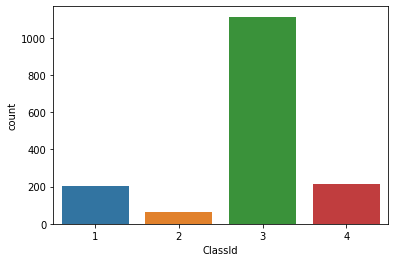

In [13]:
sn.countplot(x='ClassId', data=v_set.merge(df))

Train set class distribution:

In [14]:
test_set = [x.name for x, y in dsets.train]

In [15]:
t_set = pd.DataFrame(test_set, columns=['ImageId'])

<AxesSubplot:xlabel='ClassId', ylabel='count'>

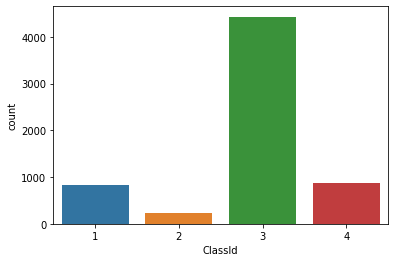

In [16]:
sn.countplot(x='ClassId', data=t_set.merge(df))

Original distribution:

<AxesSubplot:xlabel='ClassId', ylabel='count'>

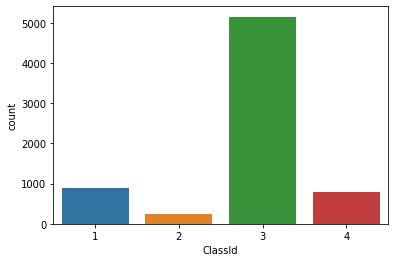

In [17]:
sn.countplot(x='ClassId', data=df)

Now that we know the splitter is working, we can load the image properly:

In [18]:
def get_x(r): return path/'train_images'/r['ImageId']
def get_y(r): return 1 # Mimicking a binary classifier (Defect/No defect). All images have defects
dblock = DataBlock((ImageBlock, CategoryBlock),
                    get_x = get_x, 
                    get_y = get_y,
                    splitter=strat_splitter)

In [19]:
dls = dblock.dataloaders(df)

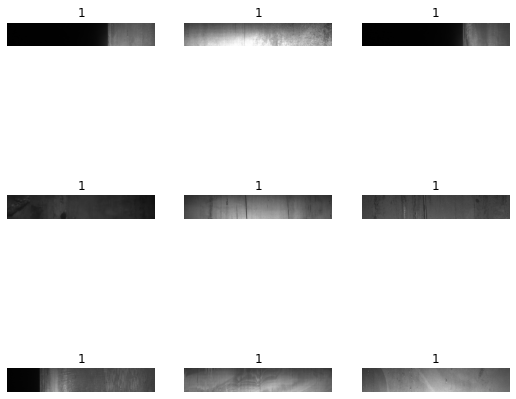

In [24]:
dls.show_batch()